# TITANIK PREDICTION AND EDA

1. [Importing Libraries](#1)
2. [Loading and Checking Data](#2)
3. [Variable Description](#3)
4. [Univariate Variable Analysis](#4)
    * Categorical Variable
    * Numerical Variable
5. [Explonatory analysis and visualizations](#5)
6. [Outlier Detection](#6)
7. [Missing Value](#7)
    * Find Missing Value
    * Fill Missing Value
8. [preprocessing](#8)
9. [building model and evaluation](#9)
10. [tuning the model](#10)
11. [visualization of the model](#11)

## <a id="1"></a> 1. Importing Libraries

In [686]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### <a id="2"></a> 2. Loading and Checking Data

In [746]:
data=pd.read_csv("train.csv")
data1=pd.read_csv("test.csv")

df=data.copy()
df1=data1.copy()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [688]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### <a id="3"></a> 3. Variable Description

* PassengerId: unique id number to each passenger
* Pclass: passenger class
* SibSp: number of siblings/spouses
* Parch: number of parents/children 
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

### <a id="4"></a> 4. Univariate Variable Analysis

In [690]:
print("TRAIN and TEST DATASET:")
df.info()

TRAIN and TEST DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [692]:
#for train dataset
df.describe().T #statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [693]:
#for test dataset
df1.describe().T #statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


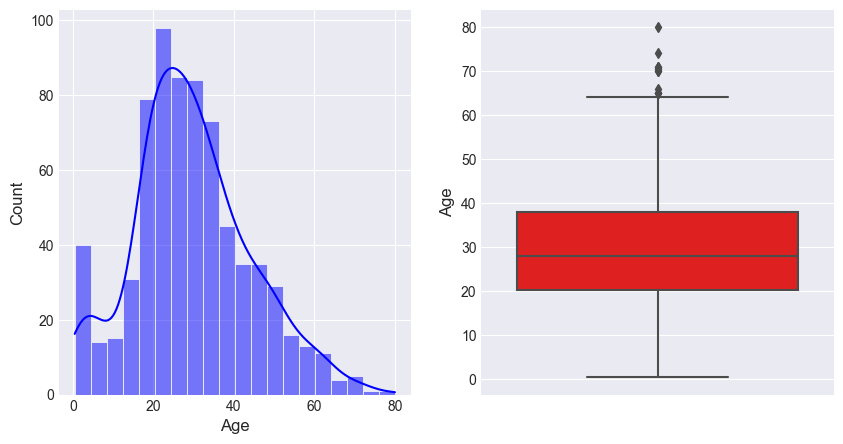

Age: 
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


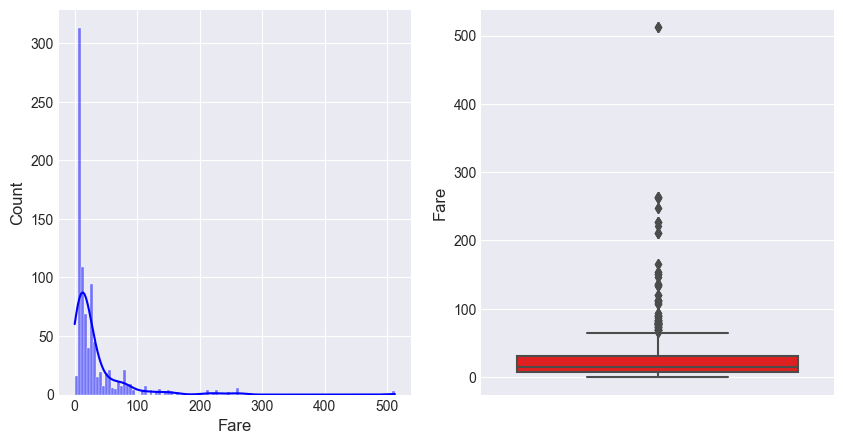

Fare: 
 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


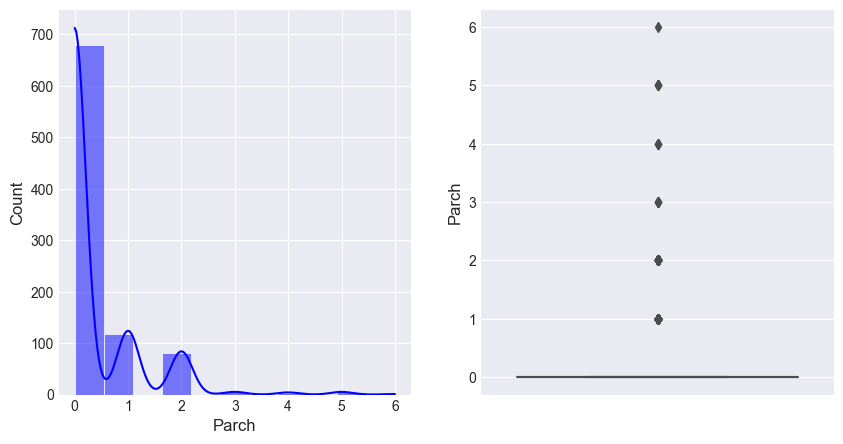

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


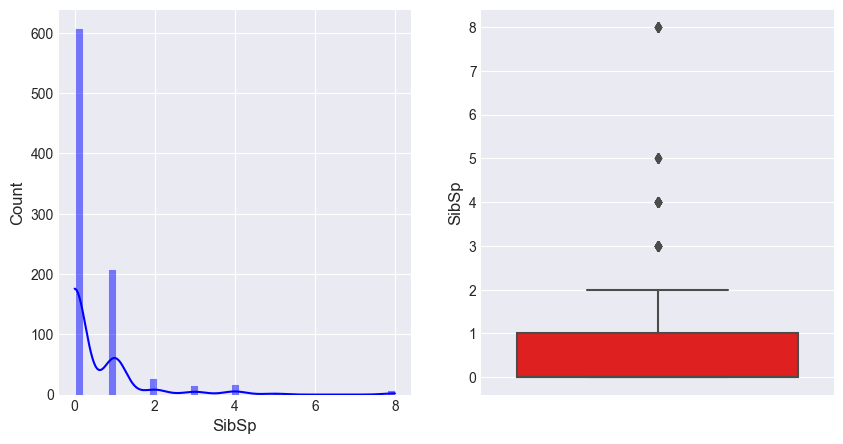

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [695]:
# plotting numerical variables distribution:

def plot_distribution(df, var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[var],color="blue",kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var],color="red")
    plt.show()
    var=df[var]
    varvalue=var.value_counts()
    
    print("{}: \n {}".format(var.name,varvalue))

features=["Age","Fare","Parch","SibSp"]
for col in df[features]:
    plot_distribution(df,col)

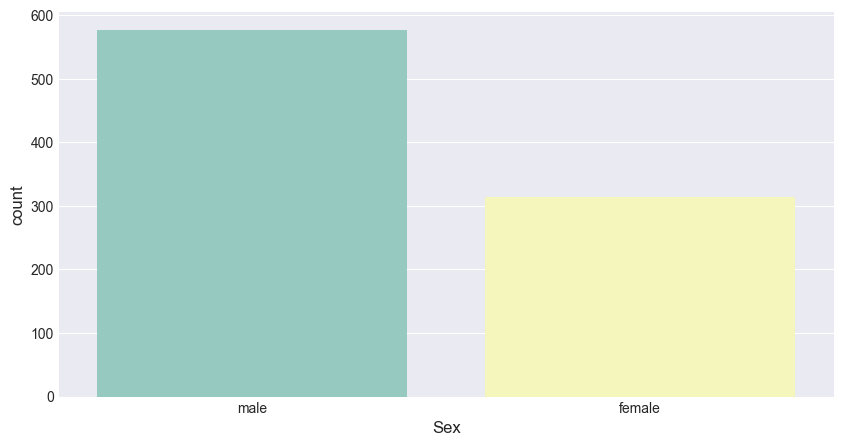

male      577
female    314
Name: Sex, dtype: int64


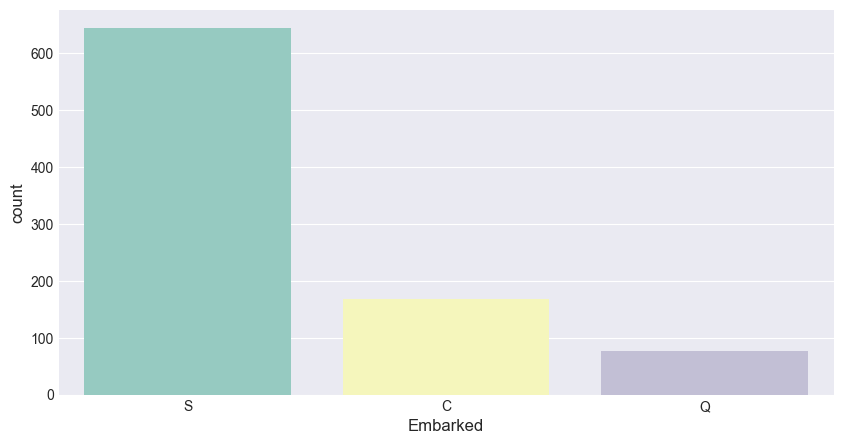

S    644
C    168
Q     77
Name: Embarked, dtype: int64


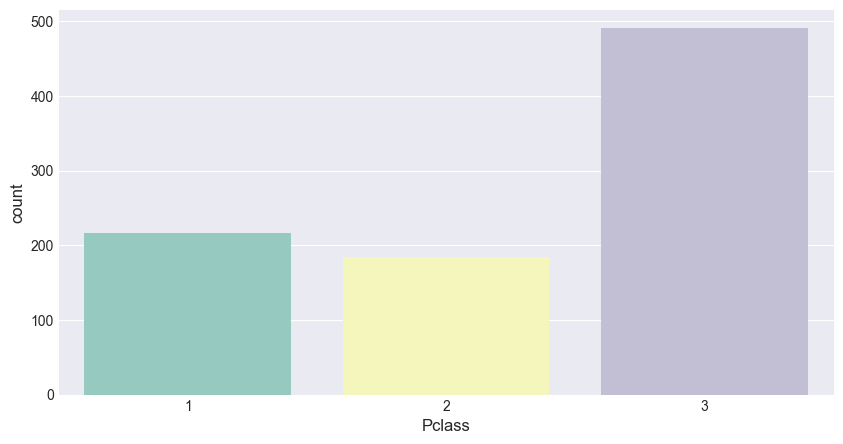

3    491
1    216
2    184
Name: Pclass, dtype: int64


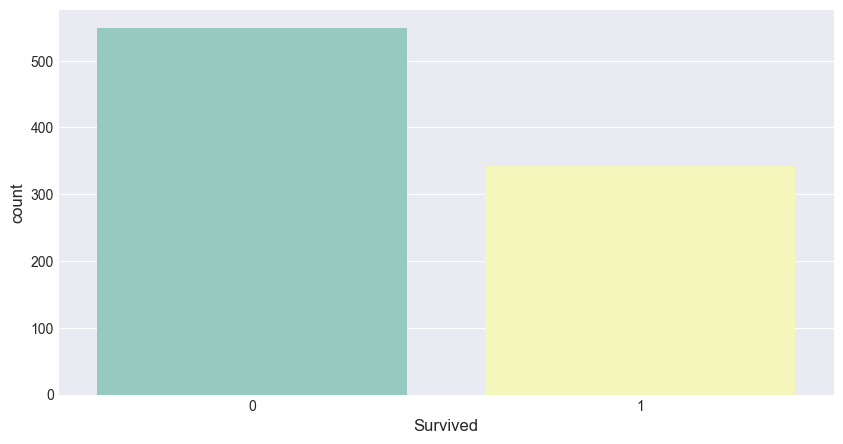

0    549
1    342
Name: Survived, dtype: int64


In [696]:
# plotting categorical variables distribution:

category=["Sex","Embarked","Pclass","Survived"]

for col in df[category]:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=df)
    plt.show()
    print(df[col].value_counts())

### <a id="5"></a> 5. Explonatory analysis and visualizations

In [697]:
# correlation between Pclass and Survived:

ps=df.groupby(["Pclass","Survived"])["Survived"].count()
ps=pd.DataFrame(ps)

px.bar(ps,x=ps.index.get_level_values(0),y="Survived",color=ps.index.get_level_values(1),title="Pclass & Survived",facet_col="Survived",
       labels={"x":"Pclass"},template="plotly_dark",text="Survived",width=800,height=400)

In [698]:
# Sex and Survived relationship:

px.histogram(x="Sex",color="Sex",facet_col="Survived",data_frame=df,template="plotly_dark",
             width=800,height=400)

In [699]:
# SibSp and Survived relationship:

px.histogram(x="SibSp",color="SibSp",facet_col="Survived",data_frame=df,template="plotly_dark",width=800,height=400,
             labels={"SibSp":"Sibling/Spouse"},title="SibSp & Survived")

Text(0.5, 1.0, 'Sibling/Spouse & Survived')

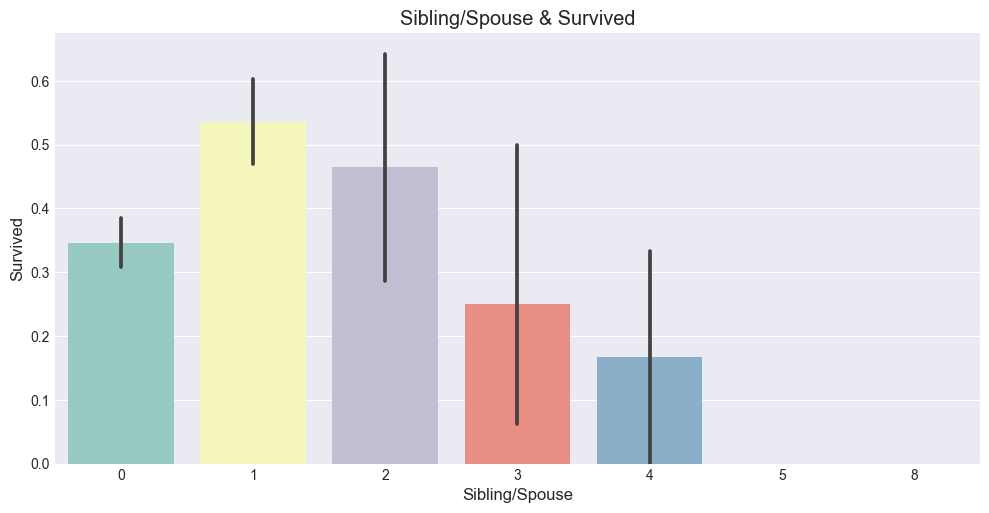

In [700]:
sns.catplot(x="SibSp",y="Survived",data=df,kind="bar",height=5,aspect=2)
plt.xlabel("Sibling/Spouse")
plt.ylabel("Survived")
plt.title("Sibling/Spouse & Survived")

In [701]:
# Parch and Survived relationship:

px.histogram(x="Parch",color="Parch",facet_col="Survived",data_frame=df,template="plotly_dark",width=800,height=400,
             labels={"Parch":"Parent/Child"},title="Parent/Child & Survived")

In [702]:
# Age and Survived relationship:

px.histogram(x="Age",color="Survived",facet_col="Survived",data_frame=df,template="plotly_dark",width=800,height=400)


<Figure size 1000x500 with 0 Axes>

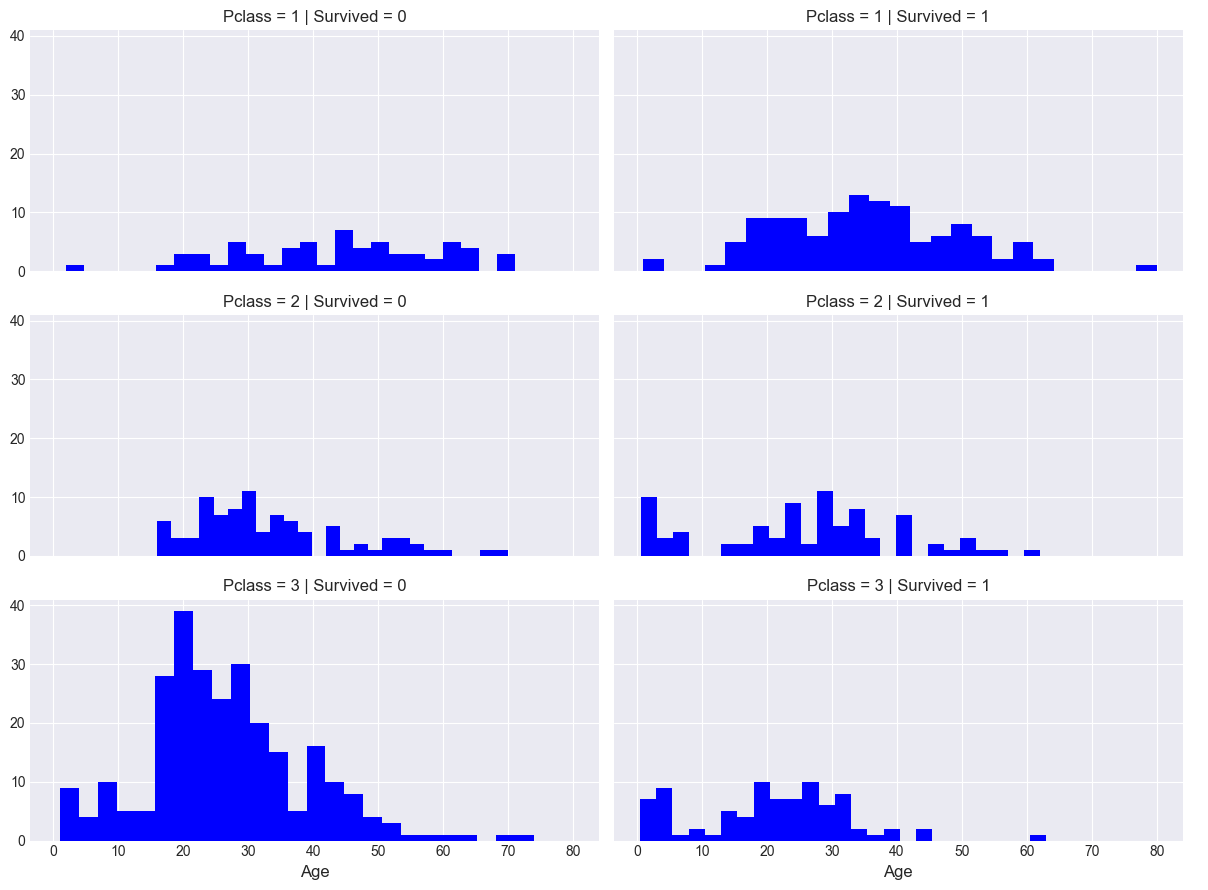

In [703]:
# Pclass,Age and Survived relationship:

plt.figure(figsize=(10,5))
t=sns.FacetGrid(df,col="Survived",row="Pclass",aspect=2)
t.map(plt.hist,"Age",bins=25,color="blue")
t.add_legend()
plt.show()

<Axes: >

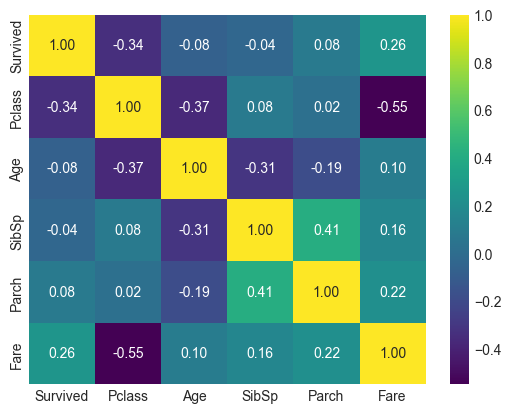

In [704]:
#correlation matrix:
df=df.drop(["PassengerId"],axis=1)
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")

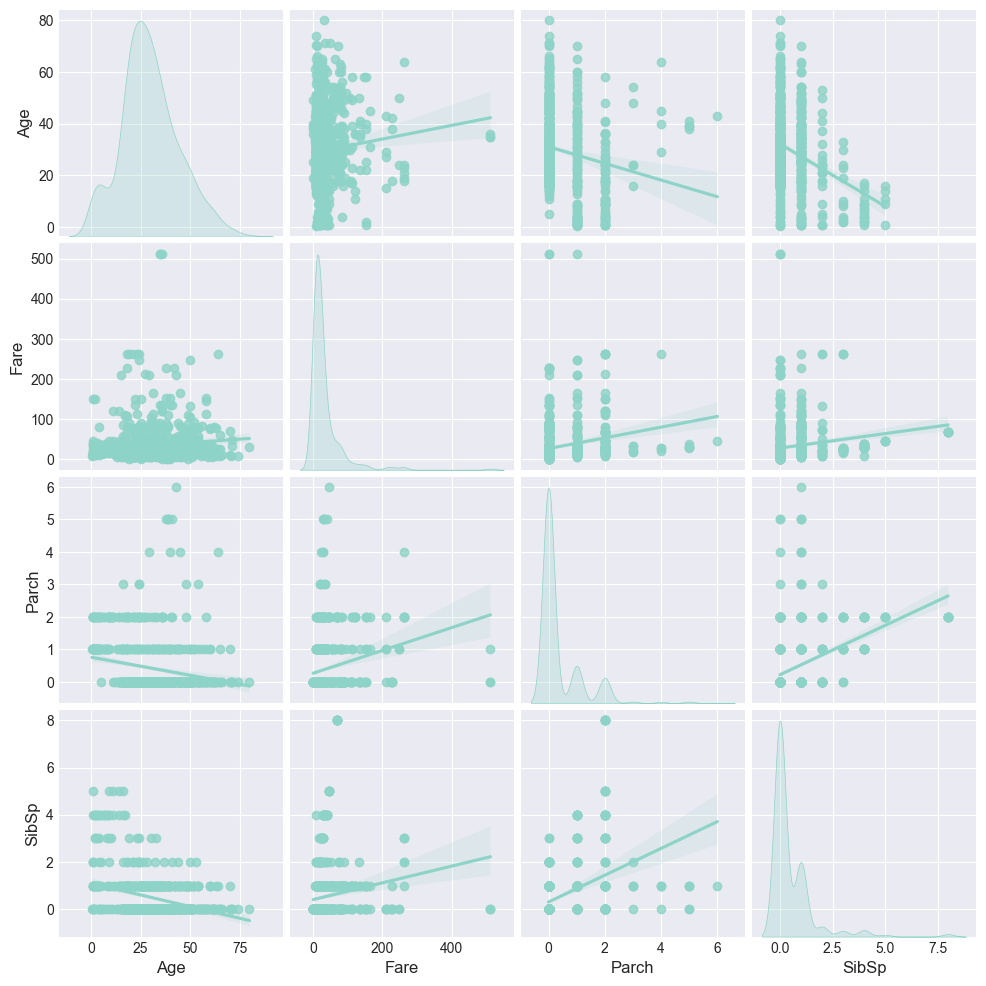

In [705]:
# distribution of all numerical variables:

sns.pairplot(df[features],kind="reg",diag_kind="kde")

### <a id="6"></a> 6. Outlier Detection

In [706]:
# detecting outliers with IQR method:
from collections import Counter


def detect_outliers(df,features):
    outlier_index=[]
    
    for i in features:
        
        Q1=np.percentile(df[i],25)
        
        Q3=np.percentile(df[i],75)
        
        IQR=Q3-Q1
        
        outlier_list_col=df[(df[i]<Q1-1.5*IQR)|(df[i]>Q3+1.5*IQR)].index
        
        outlier_index.extend(outlier_list_col)
        
        
    outlier_index=Counter(outlier_index)
    multiple_outliers=list(i for i,v in outlier_index.items() if v>2)
    
    return multiple_outliers
    
        
        

In [707]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [708]:
# dropping outliers:
df.drop(detect_outliers(df,["Age","SibSp","Parch","Fare"]),axis=0,inplace=True)


In [709]:
#visualizing after dropping outliers:

for i in features:
    fig=px.box(df,y=i,color="Survived",template="plotly_dark",width=800,height=400)
    fig.show()
    

### <a id="7"></a> 7. Missing Values

In [710]:
df=pd.concat([df,df1],axis=0).reset_index(drop=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [711]:
df.isnull().sum()

Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
PassengerId     881
dtype: int64

In [712]:
#filling missing values in Embarked and Fare with simple imputer:

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Embarked"]=si.fit_transform(df[["Embarked"]])
df["Fare"]=si.fit_transform(df[["Fare"]])

In [713]:
df.isnull().sum()

Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
PassengerId     881
dtype: int64

In [714]:
#filling missing values in Age and survived with KNN imputer:

from sklearn.impute import KNNImputer

var_names=list(df["Age"])
df["Age"]=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(df[["Age"]]),columns=["Age"])

var_names1=list(df["Survived"])
df["Survived"]=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(df[["Survived"]]),columns=["Survived"]).round()

df.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
PassengerId     881
dtype: int64

### <a id="8"></a> 8. Preprocessing

In [715]:
#feature engineering:

df["family_size"]=df["SibSp"]+df["Parch"]+1 #1 for the passenger

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,family_size
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1


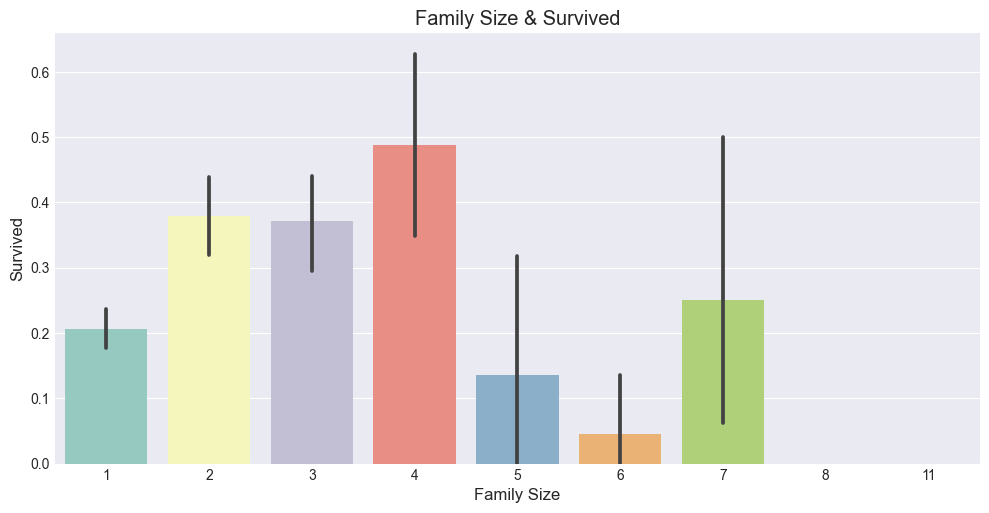

In [716]:
fig=sns.catplot(x="family_size",y="Survived",data=df,kind="bar",height=5,aspect=2)
fig.set_ylabels("Survived")
fig.set_xlabels("Family Size")
plt.title("Family Size & Survived")
plt.show()

In [717]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,family_size
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1


In [718]:
# encoding categorical variables:
#Embarked:
df["Embarked"]=df["Embarked"].astype("category")
df=pd.get_dummies(df,columns=["Embarked"])

#Pclass:
df["Pclass"]=df["Pclass"].astype("category")
df=pd.get_dummies(df,columns=["Pclass"])

#Sex:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,PassengerId,family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,2,0,0,1,0,0,1
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN,2,1,0,0,1,0,0
2,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,1,0,0,1,0,0,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN,2,0,0,1,1,0,0
4,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN,1,0,0,1,0,0,1


In [719]:
#dropping unnecessary columns:

df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,7.2500,2,0,0,1,0,0,1
1,1.0,0,38.0,1,0,71.2833,2,1,0,0,1,0,0
2,1.0,0,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1.0,0,35.0,1,0,53.1000,2,0,0,1,1,0,0
4,0.0,1,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [724]:
#Normalizations:

mm=MinMaxScaler(feature_range=(-1,1))

X=df.drop(["Survived"],axis=1)
y=df["Survived"].values.reshape(-1,1)
X=mm.fit_transform(X)



In [721]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### <a id="9"></a> 9. Building Model

In [732]:
#model building:

random_state=42
n_estimators=1000

svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = random_state, max_depth = 2)
rd=RandomForestClassifier(random_state=random_state,n_estimators=n_estimators)
gr=GradientBoostingClassifier(random_state=random_state,n_estimators=n_estimators)
xg=XGBClassifier(random_state=random_state,n_estimators=n_estimators)
lg=LGBMClassifier(random_state=random_state,n_estimators=n_estimators)
ad=AdaBoostClassifier(random_state=random_state,n_estimators=n_estimators)
v1=VotingClassifier(estimators=[("svc",svc),("knn",knn),("dt",dt),
                            ("rf",rd),("Gr",gr),("XGB",xg)],voting="hard")

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "AdaBoost","Voting"]
classifiers = [svc, knn, dt, rd, gr, xg, lg, ad,v1]


for name, clf in zip(names, classifiers):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
        
    score = clf.score(X_test, y_test)
        
    print("{}: test set score: {} ".format(name, score))
        
    score_train = clf.score(X_train, y_train)
    
    print("{}: train set score: {} ".format(name, score_train))
    
    acc=accuracy_score(y_test,pred)
    
    print("{}: accuracy score: {} ".format(name, acc))
    
    mse=mean_squared_error(y_test,clf.predict(X_test))
    
    print("{}: mean squared error: {} ".format(name, mse))
    
    rmse=np.sqrt(mse)
    
    print("{}: root mean squared error: {}".format(name, rmse))
    
    conf=confusion_matrix(y_test,pred)
   
    print("{}: confusion matrix:".format(name))
    print(conf)
    
    print("******************************")



SVC: test set score: 0.7974358974358975 
SVC: train set score: 0.7887788778877888 
SVC: accuracy score: 0.7974358974358975 
SVC: mean squared error: 0.20256410256410257 
SVC: root mean squared error: 0.45007121943543843
SVC: confusion matrix:
[[249  28]
 [ 51  62]]
******************************
KNN: test set score: 0.7794871794871795 
KNN: train set score: 0.7876787678767877 
KNN: accuracy score: 0.7794871794871795 
KNN: mean squared error: 0.2205128205128205 
KNN: root mean squared error: 0.4695879262851852
KNN: confusion matrix:
[[247  30]
 [ 56  57]]
******************************
Decision Tree: test set score: 0.8025641025641026 
Decision Tree: train set score: 0.7920792079207921 
Decision Tree: accuracy score: 0.8025641025641026 
Decision Tree: mean squared error: 0.19743589743589743 
Decision Tree: root mean squared error: 0.44433759399346057
Decision Tree: confusion matrix:
[[254  23]
 [ 54  59]]
******************************
Random Forest: test set score: 0.7205128205128205 


### <a id="10"></a> 10. Tuning the model
* I got the best results with Gradient Boosting Classifier, XGBoost Classifier and Voting Classifier,
LightGBM Classifier, RandomForest Classifer and AdaBoost Classifier. So I will use these models for hyperparameter tuning.

In [744]:
# classifer params:

gb_params={"learning_rate":[0.01,0.1,],
            "max_depth":[3,5,8],
            "n_estimators":[100,200,500]}
xgb_params={"learning_rate":[0.01,0.1],
            "max_depth":[3,5,8],
            "n_estimators":[100,200,500]}
lg_params={"learning_rate":[0.01,0.1],
            "max_depth":[3,5,8],
            "n_estimators":[100,200,500]}

rf_params={"max_depth":[3,5,8],
            "n_estimators":[100,200,500],
            "min_samples_split":[2,5,10],
            "bootstrap":[True,False],
            "criterion":["gini","entropy"]}

ada_params={"learning_rate":[0.01,0.1,],
            "n_estimators":[100,200,500]}

voting_params={"voting":["hard","soft"]}

params=[gb_params,xgb_params,lg_params,rf_params,ada_params,voting_params]
classifiers = [gr, xg, lg,rd,ad,v1]

cv_results = []
best_estimators = []

In [745]:
for i in range(len(classifiers)):
    cv=GridSearchCV(classifiers[i],params[i],cv=10,scoring="accuracy",n_jobs=-1,verbose=2)
    cv.fit(X_train,y_train)
    cv_results.append(cv.best_score_)
    best_estimators.append(cv.best_estimator_)
    print(cv_results[i])

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.7832844932844933
Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.7866056166056166
Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.7832600732600733
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
0.7876312576312576
Fitting 10 folds for each of 6 candidates, totalling 60 fits
0.7656654456654457
Fitting 10 folds for each of 2 candidates, totalling 20 fits
0.7766544566544568


### <a id="11"></a> 11.Visualization of the model

In [748]:
cv_res=pd.DataFrame({"Cross Validation Means":cv_results,"ML Models":["GradientBoosting","XGBoost","LightGBM","RandomForest","AdaBoost","Voting"]}).sort_values(by="Cross Validation Means",ascending=False)
px.bar(cv_res,x="ML Models",y="Cross Validation Means",color="Cross Validation Means",title="Cross Validation Scores",template="plotly_dark")
